#Step1. linux sh

리눅스 명령어를 통해서 현재 디렉토리를 확인합니다.

In [1]:
!pwd

/home/ubuntu/notebook/class3


In [2]:
!ls

CLASS3-whale_totaldata.ipynb  train_sort500.csv     train_sort.csv
train.csv		      train_sort500_id.csv  whale


#step2. Whale recognition Dataset

whale folder에 kaggle에서 제공한 7GB에 해당하는 데이터셋이 들어 있습니다. 단, 15% 이미지 축소 되어 있습니다. 

In [3]:
!du -h whale

348M	whale


In [4]:
!ls whale > filelist.txt && head filelist.txt

w_0.jpg
w_10000.jpg
w_10001.jpg
w_10002.jpg
w_10003.jpg
w_10004.jpg
w_10005.jpg
w_10006.jpg
w_10007.jpg
w_10008.jpg


#Step3. view img files

Ipython의 Image 명령을 통해 파일을 열어볼 수 있습니다.

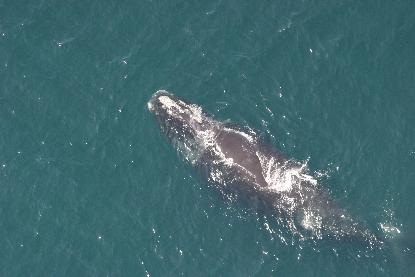

In [5]:
from IPython.display import Image
Image("./whale/w_0.jpg")

#step4. seperate train/test datset

Kaggle데이터셋은 train.csv 파일을 통해 train을 위한 데이터 목록 제공합니다. 
실습폴더에 복사해서 사용하면 됩니다. 

train.csv에 존재하지 않는 파일은 test 데이터셋을 의미합니다.
train.csv 파일에는 고래 이미지 파일명과 각 고래의 ID의 쌍으로 된 데이터를 제공합니다


In [6]:
!cp /home/ubuntu/dlday/train.csv ./.

In [7]:
!head train.csv

Image,whaleID
w_7812.jpg,whale_48813
w_4598.jpg,whale_09913
w_3828.jpg,whale_45062
w_8734.jpg,whale_74162
w_3251.jpg,whale_99558
w_8063.jpg,whale_59255
w_5624.jpg,whale_87291
w_825.jpg,whale_33152
w_3974.jpg,whale_88147


아래의 파이썬 코드는 

 폴더의 데이터 중 train.csv 파일에 존재하는 파일만 

train 폴더로  복사하여  train dataset과 test dataset을 나누는 작업이 이루어 집니다. 

아래 파이썬 코드에서는 csv 파일명과 폴더명을 지정하도록 되어 있습니다.

In [10]:
import os
import pandas as pd

train = pd.read_csv('train.csv', index_col='Image')
os.makedirs('./whale_train/')
# copy image from original folder to sub folder
for image in train.index:
  old = './whale/{}'.format(image)
  new = './whale_train/{}'.format(image)
  try:
    os.rename(old, new)
  except:
    print('{} '.format(image))

w_7489.jpg 



du 명령을 통해서 살펴보면 imgs_subset 폴더는 test 데이터셋이, imgs_subset_train에는 train용 데이터셋이 있는 것을 확인할 수 있습니다. 
본 실습에서는 train 데이터셋을 이용하여 작업을 하게 됩니다.


In [11]:
!du -h whale && du -h whale_train

213M	whale
136M	whale_train


In [12]:
!ls whale_train > trainfiles.txt && head trainfiles.txt

w_1000.jpg
w_1003.jpg
w_1004.jpg
w_1005.jpg
w_1006.jpg
w_1007.jpg
w_100.jpg
w_1011.jpg
w_1012.jpg
w_1014.jpg


#step5. label subfolder 제작 

DIGITS 데이터셋을 준비하기 위한 제일 중요한 동작입니다. 

DIGITS는 데이터셋 폴더 아래에 라벨에 해당하는 폴더를 가지고 있어야 합니다. 


아래  파이썬 코드는 다음의 작업을 수행합니다.

1. train.csv 파일을 읽어들임.
2. 저장할 폴더 설정 
3. whale ID를 인식하여 subfolder를 생성하고 파일을 이동함

In [13]:

import os
import pandas as pd

train = pd.read_csv('train.csv', index_col='Image')
#foldername of whale ID
whaleIDs = list(train['whaleID'].unique())
#make subdirectory with whale ID
for w in whaleIDs:
  os.makedirs('./whale_train_subfolder/'+w)
# copy image from original folder to sub folder
for image in train.index:
  folder = train.loc[image, 'whaleID']
  old = './whale_train/{}'.format(image)
  new = './whale_train_subfolder/{}/{}'.format(folder, image)
  try:
    os.rename(old, new)
  except:
    print('{} - {}'.format(image,folder))

w_7489.jpg - whale_70138


각 폴더를 확인해 보면 

데이터 폴더 내에 각 고래 아이디 별로 폴더가 생성된 것을 확인할 수 있습니다. 
또한, 하나의 폴더를 선택하여 그 안에 들어있는 파일 목록을 확인해볼 수 있습니다. 
실습을 위해 500장 imgs_subset 데이터 중 train 데이터셋만 활용하였기 때문에 
각각의 고래 아이디당 많지 않은 이미지만 들어있는 것을 확인할 수 있습니다. 

In [14]:
!du -h ./whale_train_subfolder

228K	./whale_train_subfolder/whale_36154
92K	./whale_train_subfolder/whale_22059
152K	./whale_train_subfolder/whale_30074
948K	./whale_train_subfolder/whale_65586
52K	./whale_train_subfolder/whale_04480
236K	./whale_train_subfolder/whale_95831
476K	./whale_train_subfolder/whale_36300
60K	./whale_train_subfolder/whale_16762
300K	./whale_train_subfolder/whale_22297
832K	./whale_train_subfolder/whale_48813
28K	./whale_train_subfolder/whale_77984
472K	./whale_train_subfolder/whale_06069
108K	./whale_train_subfolder/whale_38302
92K	./whale_train_subfolder/whale_90141
32K	./whale_train_subfolder/whale_56281
200K	./whale_train_subfolder/whale_16738
412K	./whale_train_subfolder/whale_12820
500K	./whale_train_subfolder/whale_59173
1.3M	./whale_train_subfolder/whale_55079
176K	./whale_train_subfolder/whale_82064
236K	./whale_train_subfolder/whale_44071
308K	./whale_train_subfolder/whale_84178
192K	./whale_train_subfolder/whale_74162
748K	./whale_train_subfolder/whale_68116
168K	./whale_train_sub

마지막으로 데이터셋의 위치를 확인합니다



In [15]:
!pwd & ls

/home/ubuntu/notebook/class3
CLASS3-whale_totaldata.ipynb  train_sort500.csv     whale_train
filelist.txt		      train_sort500_id.csv  whale_train_subfolder
train.csv		      train_sort.csv
trainfiles.txt		      whale


#STEP6  DIGITS DB 생성하기
이제 DIGITS에서 데이터셋을 등록할 수 있습니다. 
데이터의 위치는 다음과 같습니다. 
# /home/ubuntu/notebook/class3/whale_train_subfolder